In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# DATA INSPECTION

In [2]:
df=pd.read_csv("Churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The 'TotalCharges' column is expected to be of float type, but due to some blank values, it is currently of object type. To resolve this, we are replacing the blank entries with 0 and converting the column to float.

In [3]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In the CSV file, the 'SeniorCitizen' column has values 0 and 1, which indicate whether a person is a senior citizen or not. But Pandas is treating it as an integer, so we need to replace it as well

In [4]:

df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [ ]:
df.duplicated().sum() #This will tell us about the entire DataFrame, but we want to check for duplicates based on a unique column — to see if a customer has been entered multiple times.

df["customerID"].duplicated().sum()

np.int64(0)

#  DATA ANALYSIS 

       Churn
Churn       
No      5174
Yes     1869


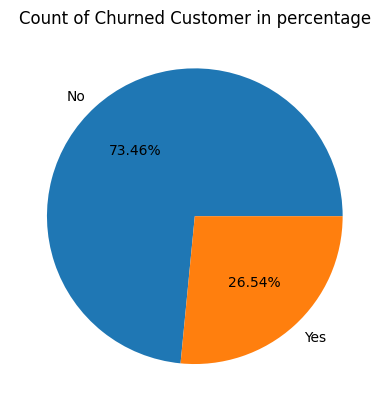

<Figure size 300x400 with 0 Axes>

In [ ]:
gb=df.groupby("Churn").agg({"Churn":"count"}) # To count the churned customer
print(gb)
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%") # to see data in percentage form
plt.title("Count of Churned Customer in percentage") 
plt.figure(figsize=(3,4))               
plt.show()

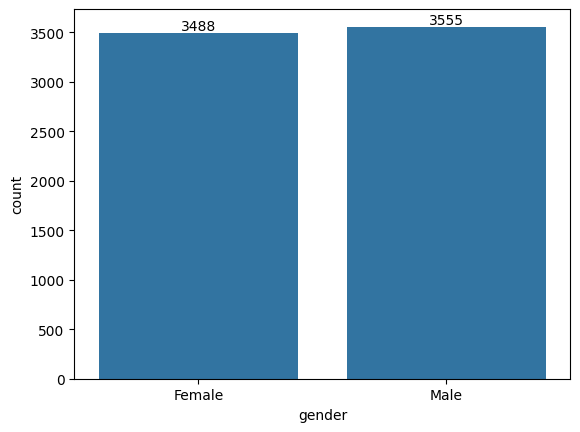

In [13]:
ax=sb.countplot(data=df,x="gender")# To count male and female
ax.bar_label(ax.containers[0])
plt.show()

##
To explore why customer churned

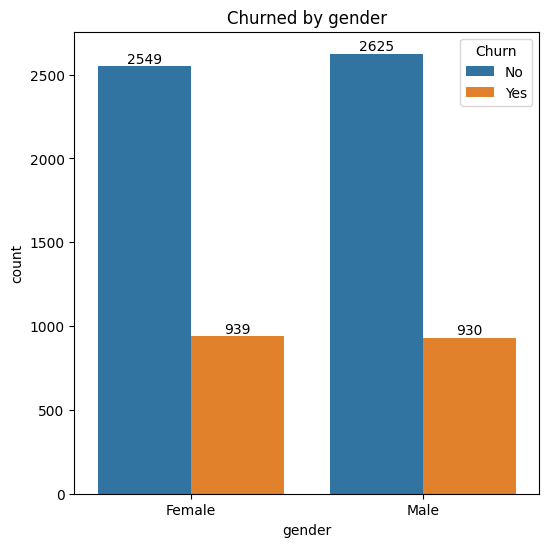

In [16]:
plt.figure(figsize=(6,6))
ax=sb.countplot(data=df,x="gender",hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned by gender")
plt.show()

### Observation 
Gender is not responsible for churning

               SeniorCitizen
SeniorCitizen               
No                      5901
Yes                     1142


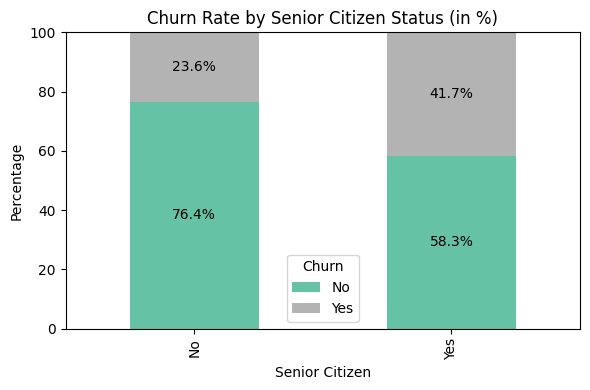

In [17]:
gb=df.groupby("SeniorCitizen").agg({"SeniorCitizen":"count"})
print(gb)
grouped = df.groupby(["SeniorCitizen", "Churn"]).size().unstack(fill_value=0)

# 📈 Step 2: Convert to percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 🎨 Step 3: Plot stacked bar chart
ax = percentages.plot(kind="bar", stacked=True, figsize=(6,4), colormap="Set2")
plt.title("Churn Rate by Senior Citizen Status (in %)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.ylim(0, 100)

# 🧮 Step 4: Add labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

plt.tight_layout()
plt.show()


### Observation
Among senior citizen customers, 41.7% have churned.


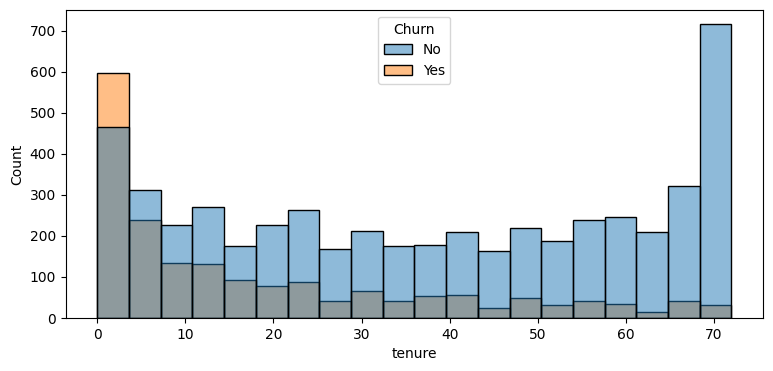

In [18]:
plt.figure(figsize=(9,4))
sb.histplot(data=df,x="tenure", edgecolor="black",hue="Churn",bins=20) # bins ki max size 72 hoti hai
plt.show()

### Observation
Based on the data, we can say that most customers tend to churn in the early months of their subscription.

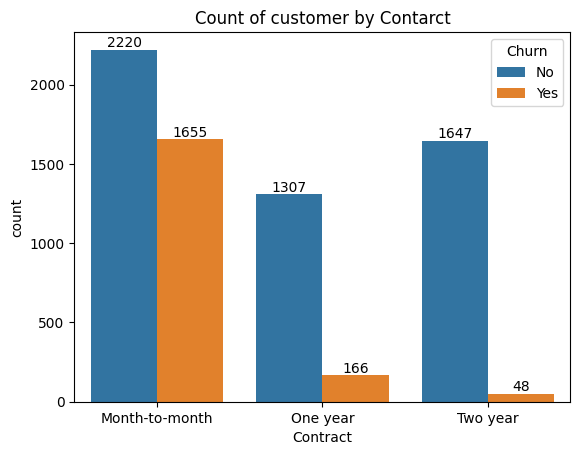

In [ ]:
ax=sb.countplot(data=df,x="Contract", hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Count of customer by Contarct")
plt.show()

### Observation
Mostly customer that take monthly plan has churned

In [27]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

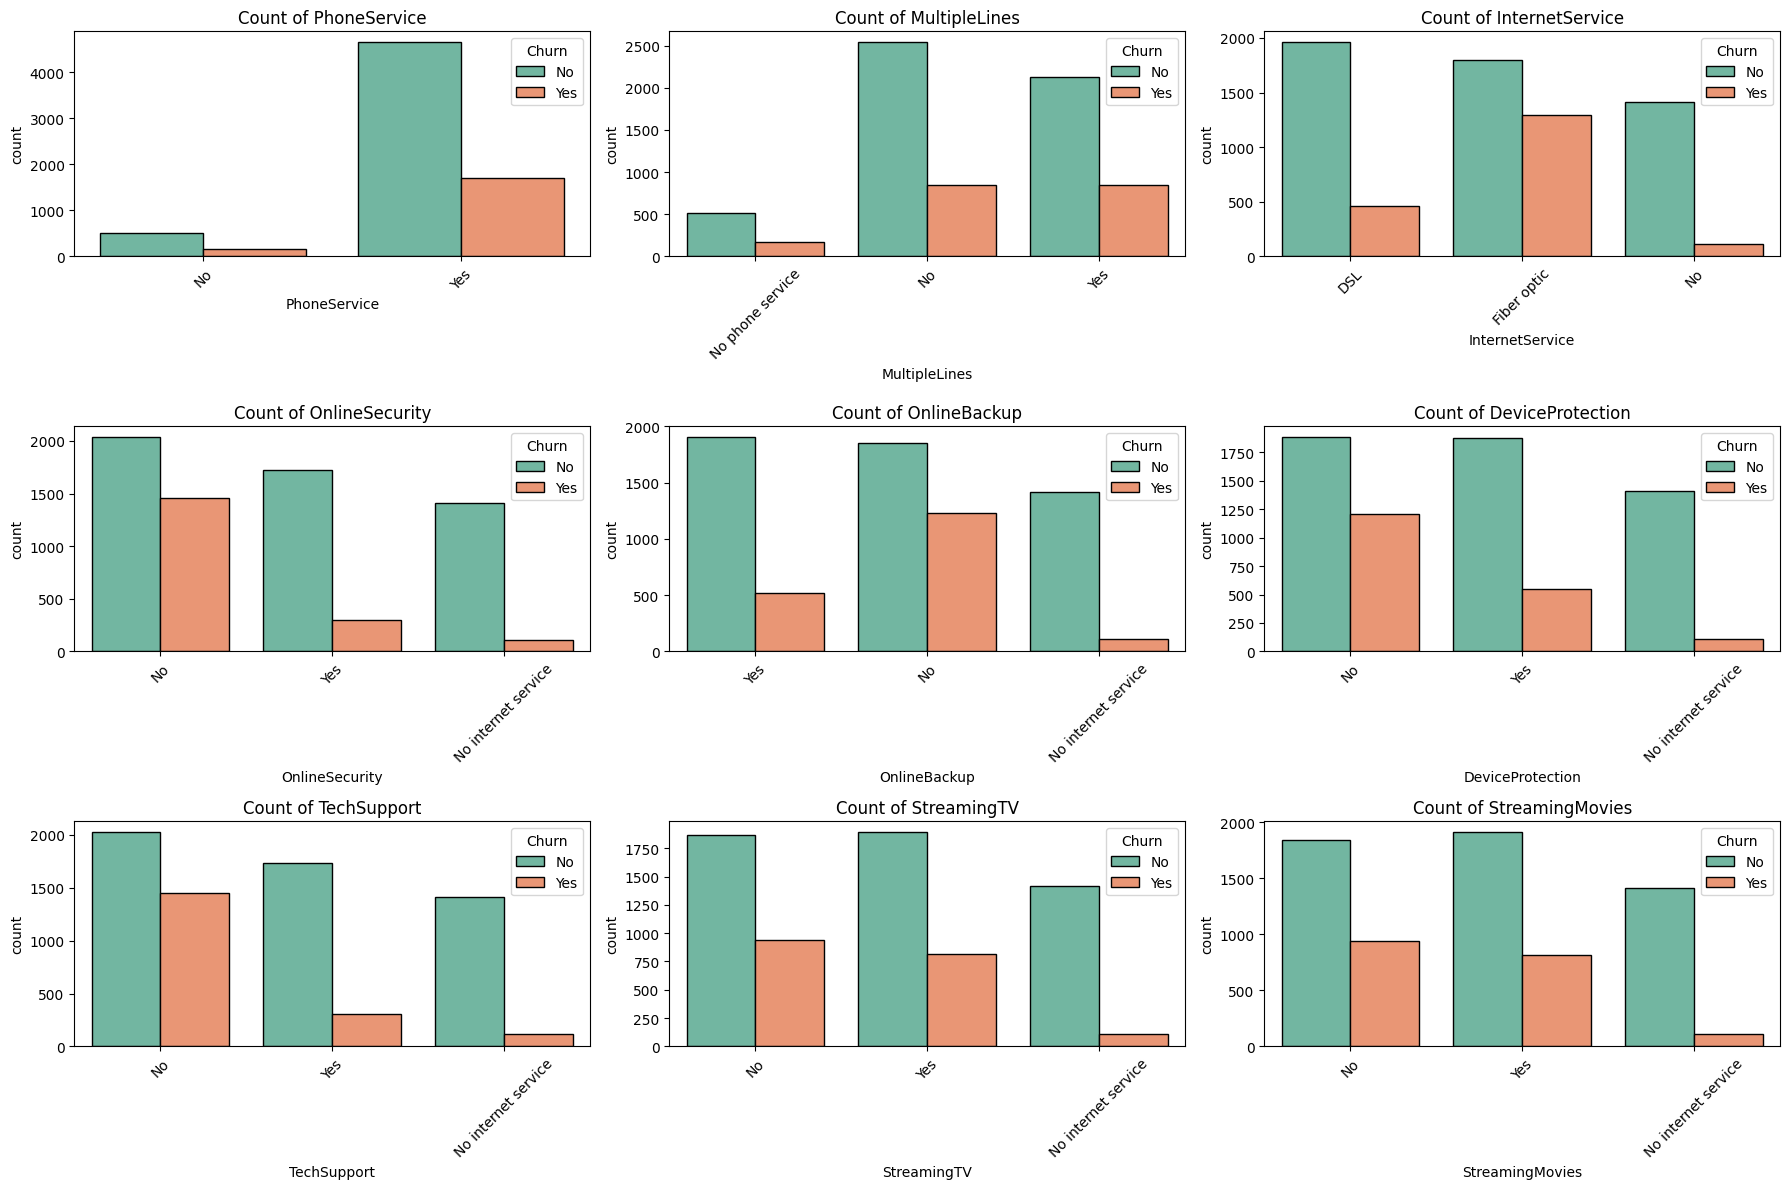

In [28]:
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Loop through each column and plot
for i, col in enumerate(cols):
    sb.countplot(data=df, x=col, ax=axes[i], hue="Churn",palette="Set2", edgecolor="black")
    axes[i].set_title(f"Count of {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


### Observation
- Customers without additional services like OnlineSecurity, TechSupport, and DeviceProtection show significantly higher churn rates.

- Fiber optic internet users have a noticeably higher churn compared to DSL or no internet service.


Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113


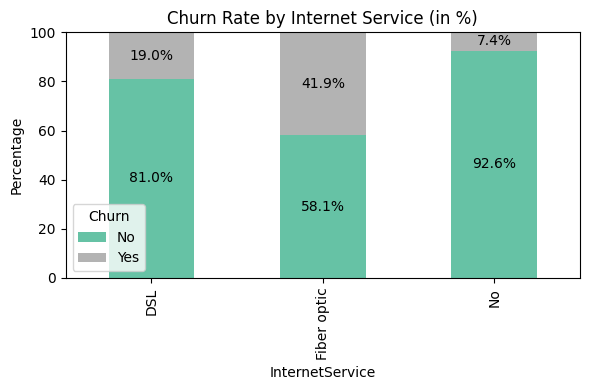

In [23]:
grouped = df.groupby(["InternetService", "Churn"]).size().unstack(fill_value=0)
print(grouped)

# 📈 Step 2: Convert to percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 🎨 Step 3: Plot stacked bar chart
ax = percentages.plot(kind="bar", stacked=True, figsize=(6,4), colormap="Set2")
plt.title("Churn Rate by Internet Service (in %)")
plt.ylabel("Percentage")
plt.xlabel("InternetService")
plt.ylim(0, 100)

# 🧮 Step 4: Add labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

plt.tight_layout()
plt.show()

### Observation
Mostly customer that choose fiber optic as internet service has churned(42% about)

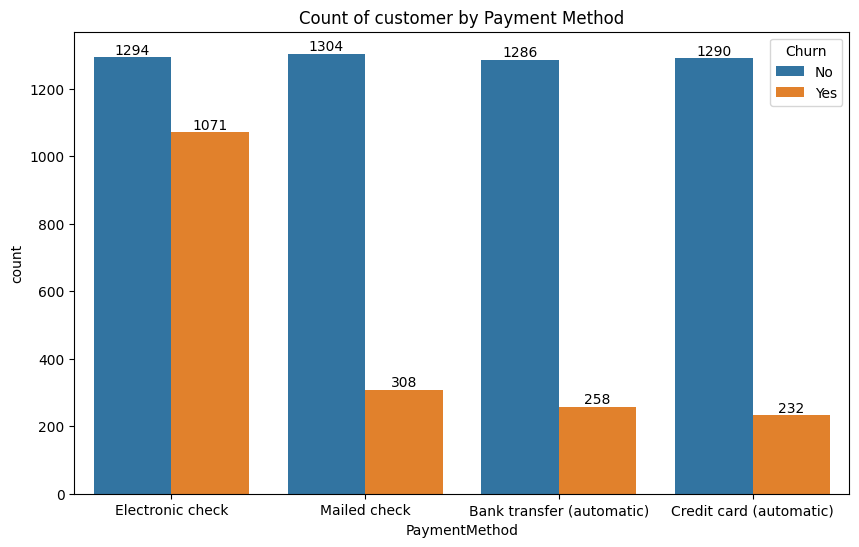

In [29]:
plt.figure(figsize=(10,6))

ax=sb.countplot(data=df,x="PaymentMethod", hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Count of customer by Payment Method")
plt.show()

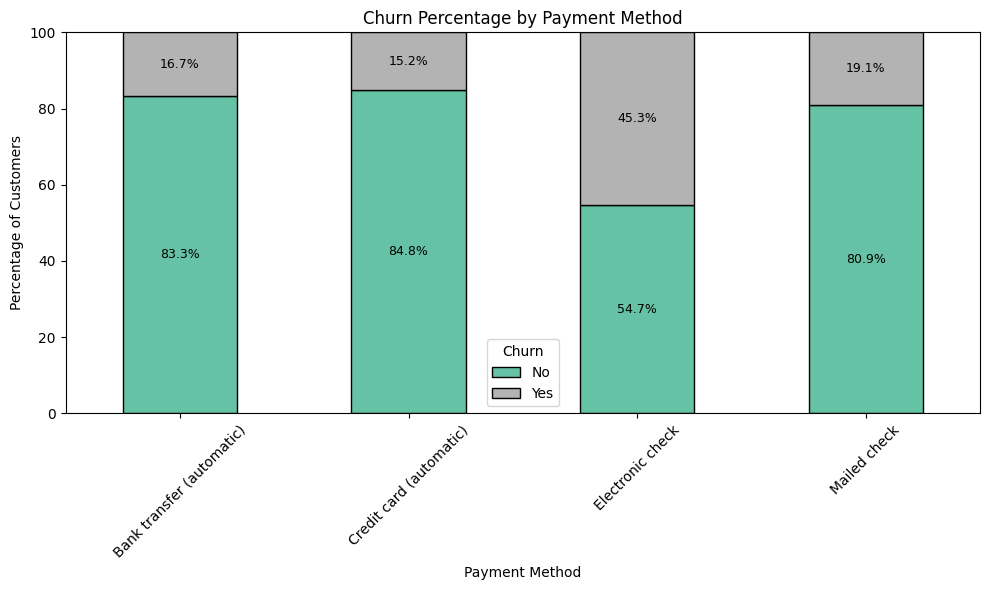

In [40]:


# Step 1: Group and count
grouped = df.groupby(["PaymentMethod", "Churn"]).size().reset_index(name="Count")

# Step 2: Pivot to get Churn = Yes/No as columns
pivot = grouped.pivot(index="PaymentMethod", columns="Churn", values="Count").fillna(0)

# Step 3: Convert to percentage
percent = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Step 4: Plot stacked bar chart
ax = percent.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2", edgecolor="black")

# Step 5: Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=9)

plt.title("Churn Percentage by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Percentage of Customers")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

### Observation
45% of customers who used Electronic Check as their payment method have churned.

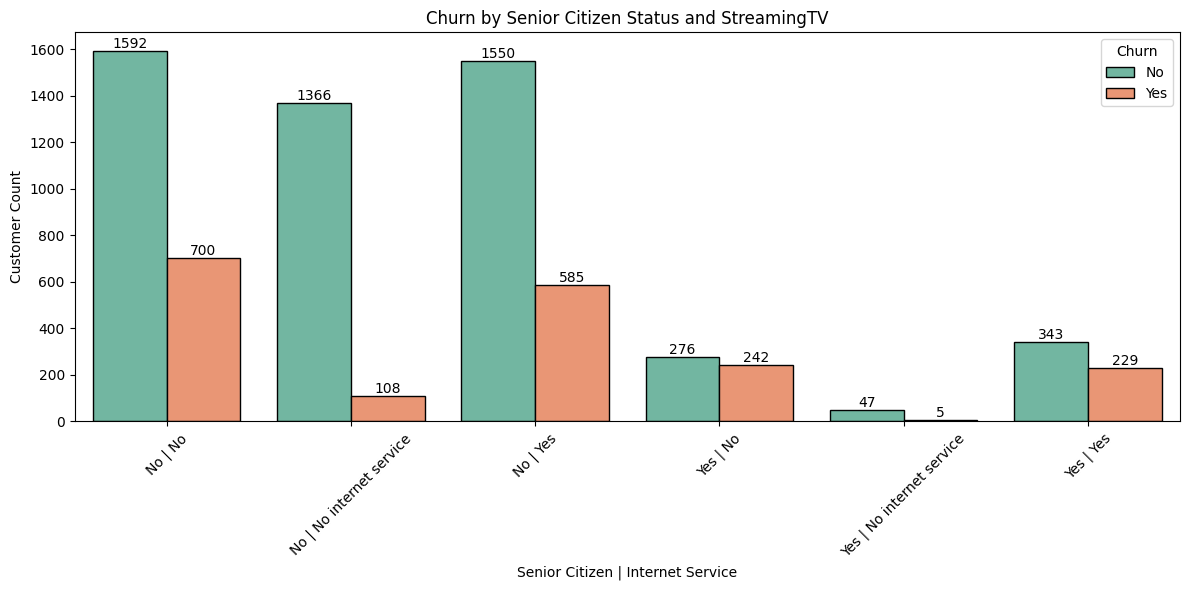

In [36]:
grouped = df.groupby(["SeniorCitizen", "StreamingTV", "Churn"]).size().reset_index(name="Count")

# Step 2: Create a combined label for x-axis
grouped["Group"] = grouped["SeniorCitizen"] + " | " + grouped["StreamingTV"]

# Step 3: Plot
plt.figure(figsize=(12,6))
ax=sb.barplot(data=grouped, x="Group", y="Count", hue="Churn", palette="Set2", edgecolor="black")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])



plt.title("Churn by Senior Citizen Status and StreamingTV")
plt.xlabel("Senior Citizen | Internet Service")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observation
In this data, the number of senior citizens without TV service is low, but among them, approximately 47% have churned.

   SeniorCitizen        Contract Churn  Count
0             No  Month-to-month    No   1854
1             No  Month-to-month   Yes   1214
2             No        One year    No   1146
3             No        One year   Yes    137
4             No        Two year    No   1508
5             No        Two year   Yes     42
6            Yes  Month-to-month    No    366
7            Yes  Month-to-month   Yes    441
8            Yes        One year    No    161
9            Yes        One year   Yes     29
10           Yes        Two year    No    139
11           Yes        Two year   Yes      6


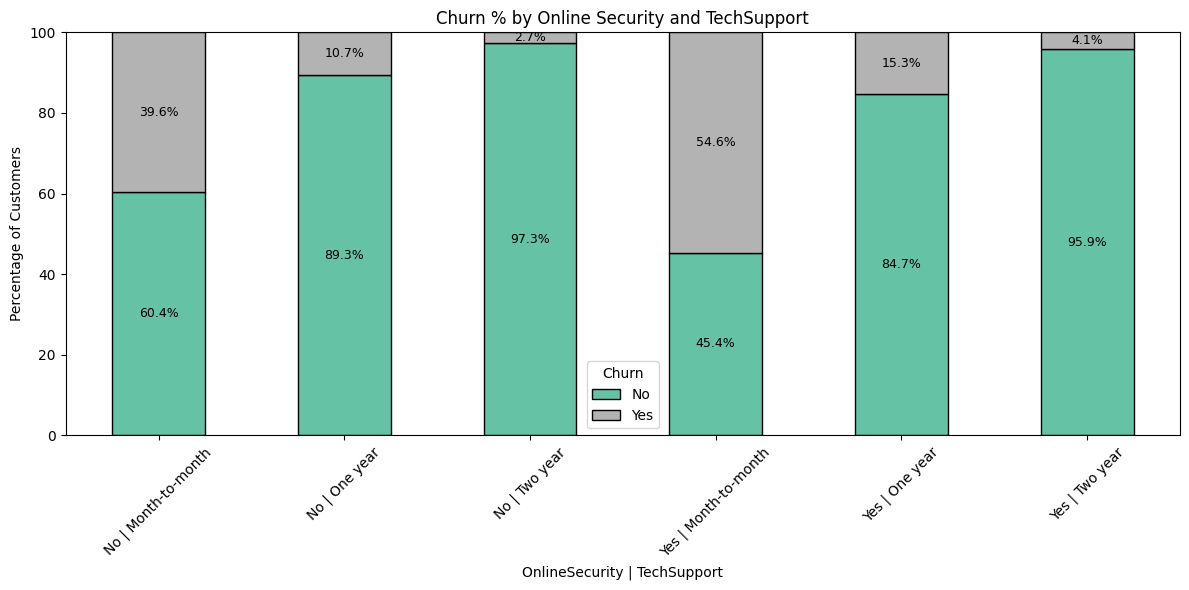

In [31]:
# Step 1: Group and pivot data
grouped = df.groupby(["SeniorCitizen", "Contract", "Churn"]).size().reset_index(name="Count")
print(grouped)
grouped["Group"] = grouped["SeniorCitizen"] + " | " + grouped["Contract"]

# Step 2: Pivot to get Churn = Yes/No as columns
pivot = grouped.pivot_table(index="Group", columns="Churn", values="Count", fill_value=0)

# Step 3: Calculate percentages
percent = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Step 4: Plot stacked bar chart
ax = percent.plot(kind="bar", stacked=True, figsize=(12,6), colormap="Set2", edgecolor="black")

# Step 5: Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=9)

plt.title("Churn % by Online Security and TechSupport")
plt.xlabel("OnlineSecurity | TechSupport")
plt.ylabel("Percentage of Customers")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

### Observation
Same,the number of senior citizens with monthly contract is low, but among them, approximately 55% have churned.

        OnlineSecurity          TechSupport Churn  Count
0                   No                   No    No   1303
1                   No                   No   Yes   1250
2                   No                  Yes    No    734
3                   No                  Yes   Yes    211
4  No internet service  No internet service    No   1413
5  No internet service  No internet service   Yes    113
6                  Yes                   No    No    724
7                  Yes                   No   Yes    196
8                  Yes                  Yes    No   1000
9                  Yes                  Yes   Yes     99


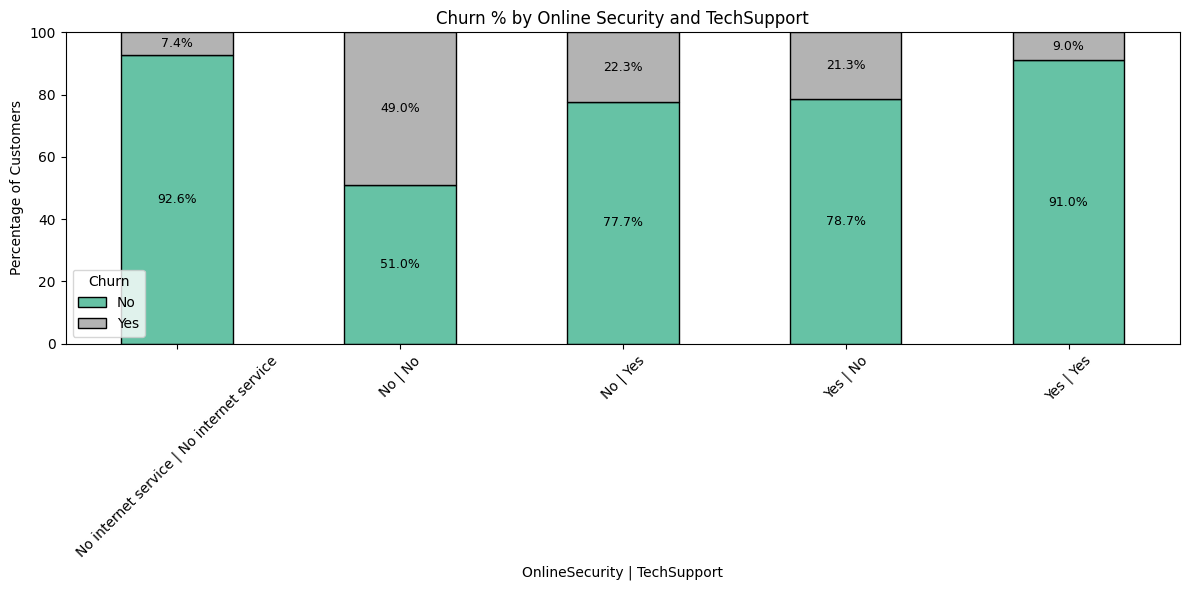

In [39]:
# Step 1: Group and pivot data
grouped = df.groupby(["OnlineSecurity", "TechSupport", "Churn"]).size().reset_index(name="Count")
print(grouped)
grouped["Group"] = grouped["OnlineSecurity"] + " | " + grouped["TechSupport"]

# Step 2: Pivot to get Churn = Yes/No as columns
pivot = grouped.pivot_table(index="Group", columns="Churn", values="Count", fill_value=0)

# Step 3: Calculate percentages
percent = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Step 4: Plot stacked bar chart
ax = percent.plot(kind="bar", stacked=True, figsize=(12,6), colormap="Set2", edgecolor="black")

# Step 5: Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=9)

plt.title("Churn % by Online Security and TechSupport")
plt.xlabel("OnlineSecurity | TechSupport")
plt.ylabel("Percentage of Customers")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


### Observation 
49% of customers that has no online security and tech support have churned.


# SUMMARY

49% of customers that has no online security and tech support have churned.
45% of customers who used Electronic Check as their payment method have churned.
42% of customer that choose fiber optic as internet service have churned